# __INTRODUCTION__


During this analysis, we are going to find out the following:
1) Country with the best and least air quality
2) Country with the best and least water quality
3) The correlation between air quality and water pollution

### __LOAD THE DATASET FOR CLEANING AND EXPLORATORY DATA ANALYSIS__

In [4]:
## we start of by importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## then load the dataset and assign it to a variable df

df = pd.read_csv('Downloads/cities_air_water_quality.csv')
df.shape

(3963, 5)

In [5]:
# our dataframe appears to have 3963 rows and 5 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [7]:
df.head()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [8]:
#To remove quotes from the column names

df.columns = df.columns.str.replace('"','', regex=False)
df.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [9]:
#to remove the space from columns names and rename for readability
df.rename(columns= {' Region' : 'Region', ' Country': 'Country', ' AirQuality' : 'Air_Quality', ' WaterPollution' : 'Water_Pollution'}, inplace = True)

In [10]:
#clean the table and remove quotes from the Region and Country columns

df['Region'] = df['Region'].str.replace('"','', regex = False)
df['Country'] = df['Country'].str.replace('"','', regex = False)
df.head()

,City,Region,Country,Air_Quality,Water_Pollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435


In [11]:
# The column Region has 425 rows with empty values. so we drop the whole colummn
df.drop(columns=['Region'], inplace = True)
df.head()

,City,Country,Air_Quality,Water_Pollution
0,New York City,United States of America,46.816038,49.504950
1,"Washington, D.C.",United States of America,66.129032,49.107143
2,San Francisco,United States of America,60.514019,43.000000
3,Berlin,Germany,62.364130,28.612717
4,Los Angeles,United States of America,36.621622,61.299435


### __EXPLORATORY DATA ANALYSIS__

#### __CATEGORICAL DATA__

In [12]:
## We can query for the 10 most represented countries in our dataset

df['Country'].value_counts().head(10)

 United States of America      842
 People's Republic of China    238
 United Kingdom                170
 Canada                        157
 India                         154
 Germany                       124
 Brazil                        103
 Poland                         94
 Russia                         86
 Spain                          78
Name: Country, dtype: int64

#### __NUMERICAL DATA__

We explore the summary statistics for insights

In [13]:
df.describe()

,Air_Quality,Water_Pollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


#### To deal with outliers and anomalities that could have been from human or sensor error, we are only going to use reading that that fall between the 2nd and 98th quartile


In [14]:
mask_air1 = df['Air_Quality'] > 2
mask_air2 = df['Air_Quality'] < 98
mask_water1 = df['Water_Pollution'] > 2
mask_water2 = df['Water_Pollution'] < 98
df= df[mask_air1 & mask_air2 & mask_water1 & mask_water2]
df.describe()

,Air_Quality,Water_Pollution
count,2687.000000,2687.000000
mean,58.814015,47.329183
std,23.865880,19.084867
min,2.272727,4.166667
25%,39.285714,33.333333
50%,62.500000,50.000000
75%,77.777778,58.333333
max,97.500000,96.875000


#### We will examine the distribution of Air quality data by plotting a Histogram and boxplot with matplotlib

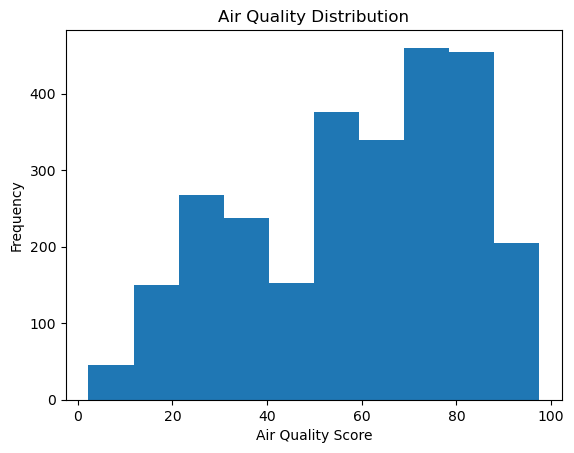

In [15]:
plt.hist(df['Air_Quality'])
plt.xlabel('Air Quality Score')
plt.title('Air Quality Distribution')
plt.ylabel('Frequency');

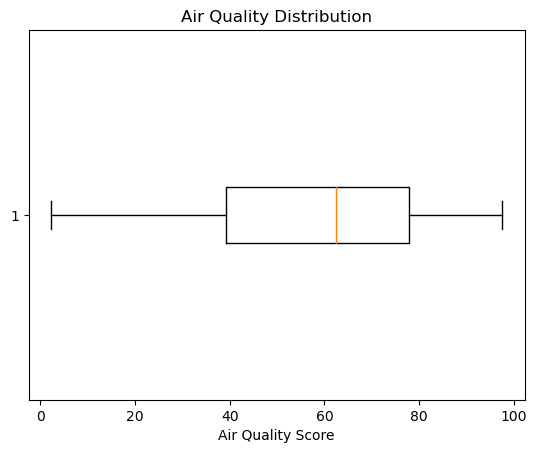

In [16]:
plt.boxplot(df['Air_Quality'], vert = False)
plt.xlabel('Air Quality Score')
plt.title('Air Quality Distribution');

#### We do the same analysis for Water Pollution.

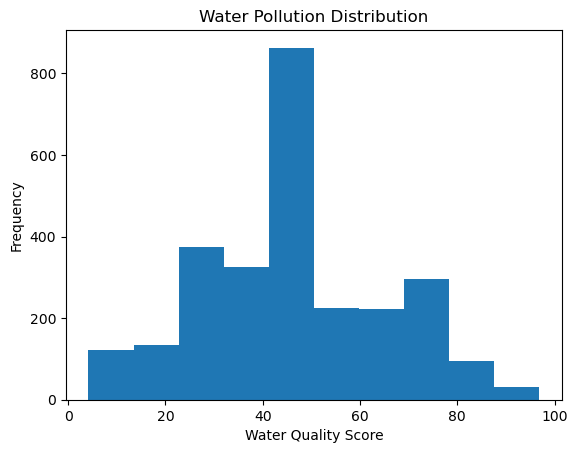

In [17]:
plt.hist(df['Water_Pollution'])
plt.xlabel('Water Quality Score')
plt.title('Water Pollution Distribution')
plt.ylabel('Frequency');

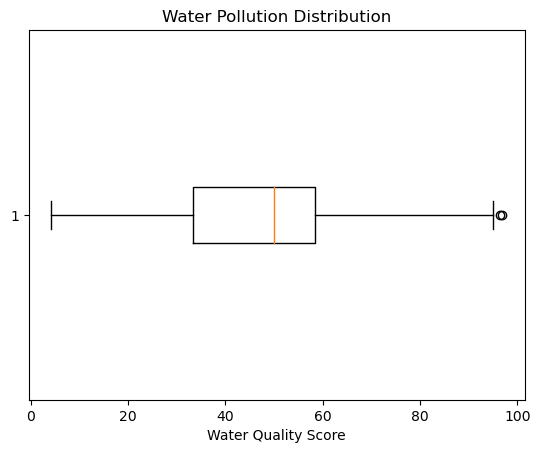

In [18]:
plt.boxplot(df['Water_Pollution'], vert = False)
plt.xlabel('Water Quality Score')
plt.title('Water Pollution Distribution');

### From the plots above, it appears our air quality data is skewed.

# Research Question 1

**What country has the best and least air quality?**

In [19]:
best_air_quality_by_country = df.groupby('Country')['Air_Quality'].mean().sort_values(ascending = False)
best_air_quality_by_country.head(10)

Country
 Eswatini       90.625000
 Finland        89.603781
 San Marino     87.500000
 Norway         84.377896
 New Zealand    83.509338
 Brunei         82.954545
 Barbados       82.500000
 Estonia        81.120087
 Austria        78.893643
 Germany        78.395903
Name: Air_Quality, dtype: float64

In [20]:
least_air_quality_by_country = df.groupby('Country')['Air_Quality'].mean().sort_values(ascending = False)
least_air_quality_by_country.tail(10)

Country
 Tunisia          22.037037
 Madagascar       20.454545
 Kazakhstan       18.889509
 El Salvador      18.421053
 Liberia          16.666667
 Mali             15.000000
 Angola           15.000000
 Haiti            12.500000
 Cote d'Ivoire     6.944444
 Guinea            5.000000
Name: Air_Quality, dtype: float64

#### We plot our finding on a bar chart using pandas

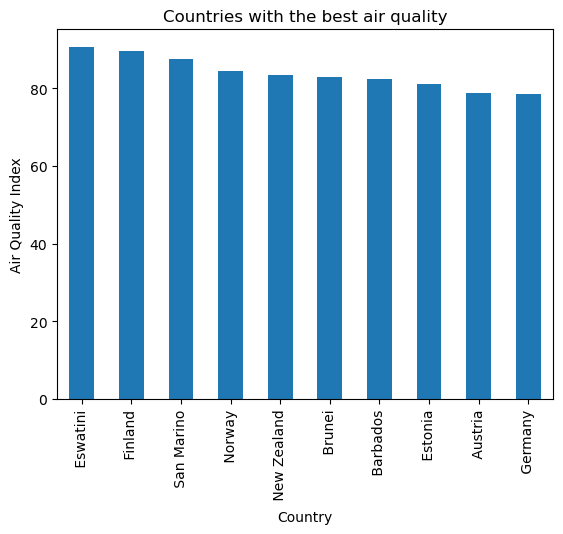

In [21]:
best_air_quality_by_country.head(10).plot(kind = 'bar', xlabel = 'Country', ylabel = 'Air Quality Index', title = 'Countries with the best air quality');

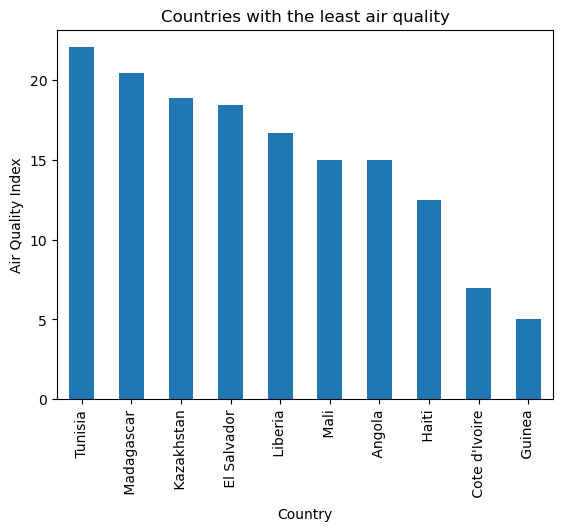

In [22]:
least_air_quality_by_country.tail(10).plot(kind = 'bar', xlabel = 'Country', ylabel = 'Air Quality Index', title = 'Countries with the least air quality');

# Research Question 2

**What country has the highest and lowest water pollution?**

In [23]:
highest_water_pollution_by_country = df.groupby('Country')['Water_Pollution'].mean().sort_values(ascending = False)
highest_water_pollution_by_country.head(10)

Country
 Malawi              95.000000
 Guinea              93.750000
 Marshall Islands    91.666667
 Gabon               87.500000
 Liberia             87.500000
 Maldives            87.500000
 Solomon Islands     84.722222
 Yemen               83.333333
 Lebanon             81.526899
 Angola              81.250000
Name: Water_Pollution, dtype: float64

In [24]:
least_water_pollution_by_country = df.groupby('Country')['Water_Pollution'].mean().sort_values(ascending = False)
least_water_pollution_by_country.tail(10)

Country
 Equatorial Guinea    30.000000
 Slovenia             27.696886
 Norway               27.363597
 Switzerland          25.233446
 Seychelles           25.000000
 Andorra              25.000000
 Zambia               25.000000
 Singapore            24.204947
 Finland              22.297063
 Sweden               18.948026
Name: Water_Pollution, dtype: float64

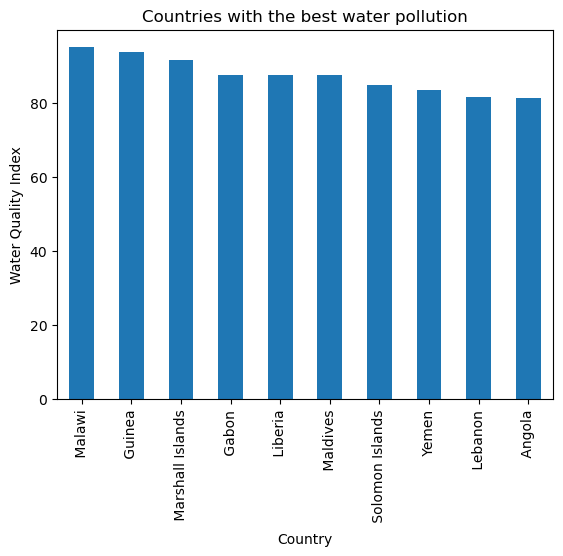

In [25]:
highest_water_pollution_by_country.head(10).plot(kind = 'bar', xlabel = 'Country', ylabel = 'Water Quality Index', title = 'Countries with the best water pollution');

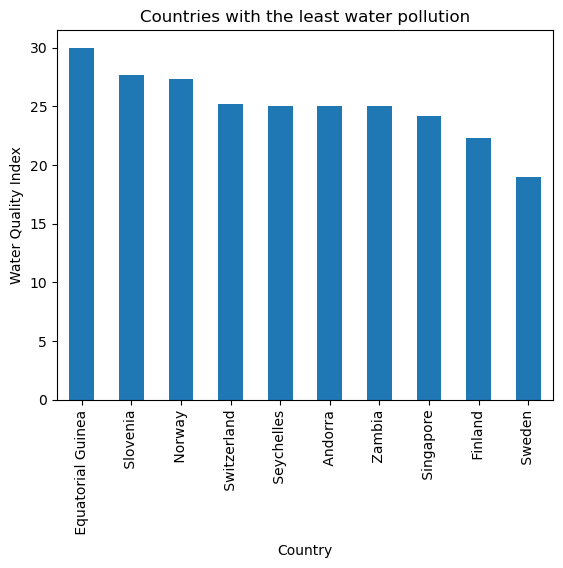

In [26]:
least_water_pollution_by_country.tail(10).plot(kind = 'bar', xlabel = 'Country', ylabel = 'Water Quality Index', title = 'Countries with the least water pollution');

# Research Question 3

**Is there a relationship between Air quality and Water Pollution? we find out by plottig a scatter plot**

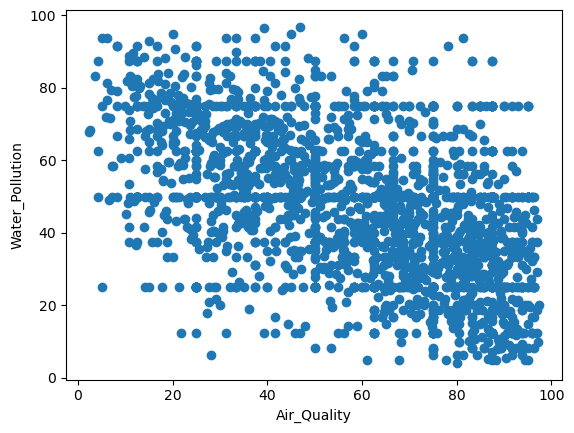

In [27]:
plt.scatter(x= df['Air_Quality'], y= df['Water_Pollution'])
plt.xlabel('Air_Quality')
plt.ylabel('Water_Pollution');

In [28]:
## To calculate the correlation coefficient

df['Air_Quality'].corr(df['Water_Pollution'])

-0.4505281870505086

**The correlation coefficient appears to be approximately -0.45 meaning there is an average negative correlation between both variables. Hence, higher the air quality, there's a chance of a lower water pollution.**